In [1]:
# Señal sinusoidal delimitada en el tiempo, usada para el procesamiento de la señal
# Quitar ruido a señales, para comprimir images, detección de bordes

import numpy as np
import matplotlib.pyplot as plt
import pywt


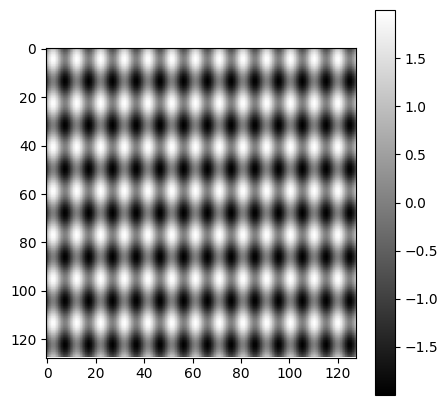

In [2]:
x, y = np.mgrid[0:1:128j, 0:1:128j]
image = np.sin(2.0*np.pi*7*x) + np.sin(2.0*np.pi*13*y)
plt.figure(figsize=(5,5))
plt.imshow(image, cmap="gray")
plt.colorbar()
plt.show()

[array([[ 3.94386869, -0.51707126,  0.31771466,  3.69671167, -1.51749882,
         1.86149818,  2.6962841 , -1.76465584],
       [ 4.87420354,  0.4132636 ,  1.24804952,  4.62704652, -0.58716396,
         2.79183304,  3.62661896, -0.83432099],
       [ 4.74223181,  0.28129187,  1.11607779,  4.49507479, -0.71913569,
         2.65986131,  3.49464723, -0.96629272],
       [ 3.61735871, -0.84358124, -0.00879532,  3.37020168, -1.8440088 ,
         1.5349882 ,  2.36977412, -2.09116583],
       [ 2.09116583, -2.36977412, -1.5349882 ,  1.8440088 , -3.37020168,
         0.00879532,  0.84358124, -3.61735871],
       [ 0.96629272, -3.49464723, -2.65986131,  0.71913569, -4.49507479,
        -1.11607779, -0.28129187, -4.74223181],
       [ 0.83432099, -3.62661896, -2.79183304,  0.58716396, -4.62704652,
        -1.24804952, -0.4132636 , -4.87420354],
       [ 1.76465584, -2.6962841 , -1.86149818,  1.51749882, -3.69671167,
        -0.31771466,  0.51707126, -3.94386869]]), (array([[  9.5931448 ,   9.59

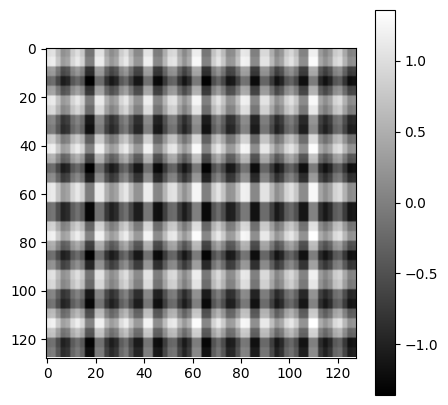

In [3]:
# COMPRESION DE IMAGENES
 # Perform 2D DWT with Daubechies wavelet db1
coeffs2 = pywt.wavedec2(image, 'db1', level=4)
# 'coeffs' now contains the 2D wavelet coefficients
print(coeffs2)
all_coeffs = np.concatenate([c.ravel() for sublist in coeffs2 for c in sublist if isinstance(c,np.ndarray)])

percent = 10
threshold = np.percentile(np.abs(all_coeffs), 100-percent)

# coeffs2_threshold = [(pywt.threshold(c,threshold, mode="soft") if isinstance(c, np.ndarray) else c) for c in coeffs2]
# El umbral no se está aplicando correctamente a la estructura de coeficientes que pywt.wavedec2 devuelve
# No está recorriendo correctamente todos los niveles ni aplicando el umbral a los sub-bloques (detalles horizontales, verticales y diagonales) de cada nivel
# Solo el primer elemento (cA4) es un array directo. El resto son tuplas de tres arrays.

# Aplicar umbral
coeffs2_threshold = [coeffs2[0]]
for detail_level in coeffs2[1:]:
    thresholded_level = tuple(
        pywt.threshold(c, threshold, mode='soft') for c in detail_level
    )
    coeffs2_threshold.append(thresholded_level)

compressed_image = pywt.waverec2(coeffs2_threshold, "db1")

plt.figure(figsize=(5,5))
plt.imshow(compressed_image, cmap="gray")
plt.colorbar()
plt.show()

# PARECE QUE NO APLICA EL THRESHOLD


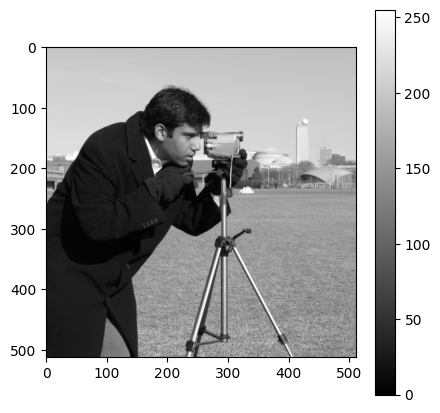

In [7]:
from skimage import data

img = data.camera()
plt.figure(figsize=(5,5))
plt.imshow(img, cmap="gray")
plt.colorbar()
plt.show()


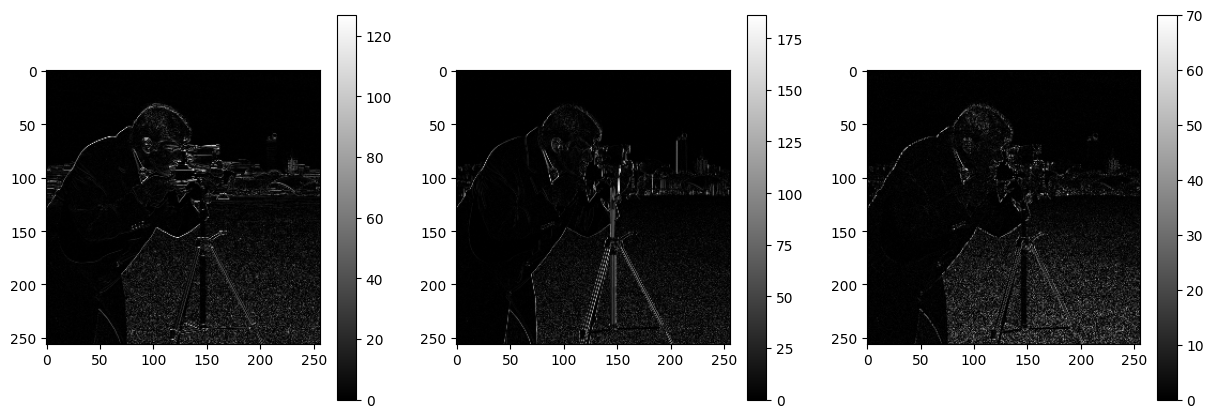

In [8]:
coeffs = pywt.wavedec2(img, "db1", level=1)
cA, (cH, cV, cD) = coeffs
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(np.abs(cH), cmap="gray")
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.abs(cV), cmap="gray")
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(cD), cmap="gray")
plt.colorbar()
plt.show()